# Модель кластеризации KMeans

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Данные

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, 
                  random_state=10)

In [9]:
X.shape, y.shape

((100, 2), (100,))

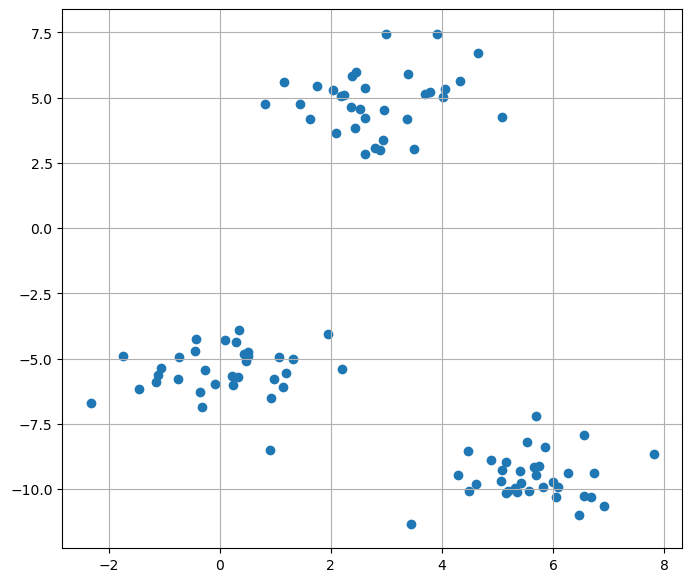

In [53]:
plt.figure(figsize=(8, 7))
plt.grid()
plt.scatter(x=X[:, 0], y=X[:, 1]);

# Алгоритм KMeans

## Инициализация центроид

Определить количество кластеров

In [43]:
k = 3 

Случайным образом выбрать $k$ точек в качестве изначальных центров кластеров

In [44]:
# Индексы случайных k центроид
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [45]:
# Центроиды по соответствующим индексам
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [60]:
# Цвета кластеров
colors=['orange', 'green', 'red']

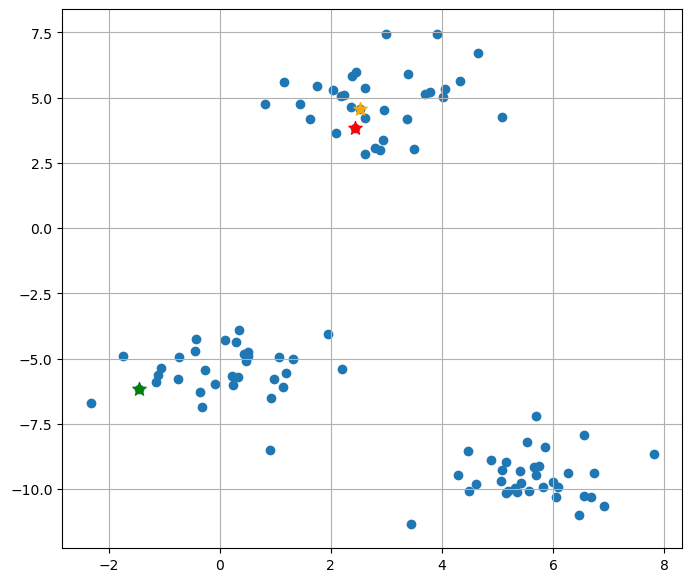

In [58]:
plt.figure(figsize=(8, 7))
plt.grid()

plt.scatter(X[:, 0], X[:, 1])
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='*', c=colors[i], s=100);

## Первая итерация обучения

Для каждой точки из выборки определить к какой центроиде она ближе.\
Рассчитать евклидово расстояние между центроидами и точками
$$
\sqrt{\sum{(x_1 - x_2)^2}}
$$

In [97]:
# Словарь для хранения кластеров
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [98]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
    cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
    clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

In [99]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

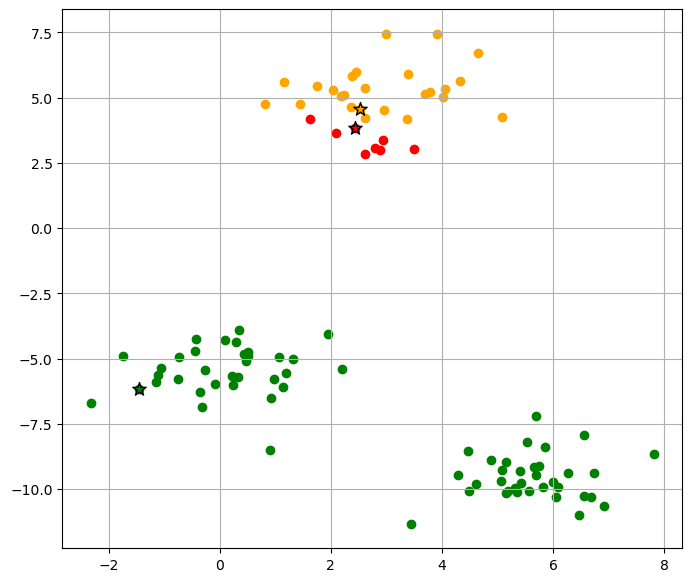

In [142]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

### Пересчет центроидов

Переместить центроид в центр своего кластера.\
Определить среднее арифметическое всех точек кластера, по столбечно

In [157]:
new_centroids={}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

In [158]:
new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

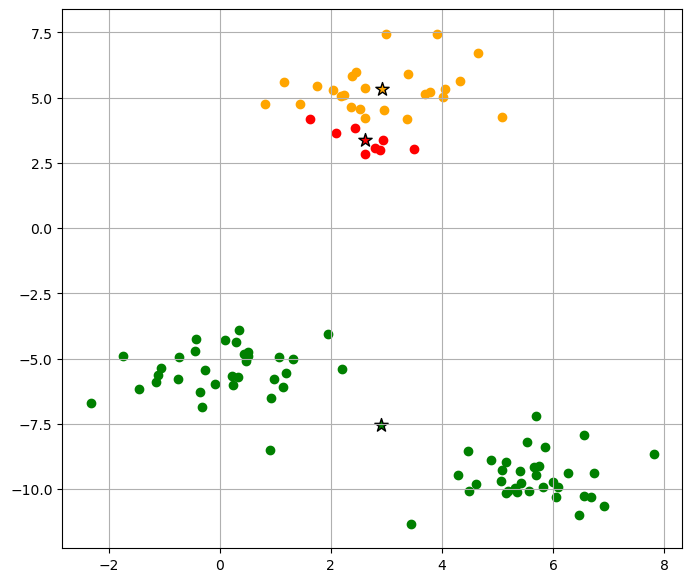

In [162]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Новые центроиды
for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], c=colors[i], marker="*", edgecolors='black', s=100)

## Вторая итерация обучения

Повторение предыдущих шагов до сходимости (до тех пор, пока величина смещения центроидов после каждого шага станет незначительной)

In [174]:
# Переназначаем центроиды на новые
centroids = np.array(list(new_centroids.values()))
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [175]:
# Очищаем словарь кластеров
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [176]:
# Пересчитываем кластера
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
    cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
    clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

In [177]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

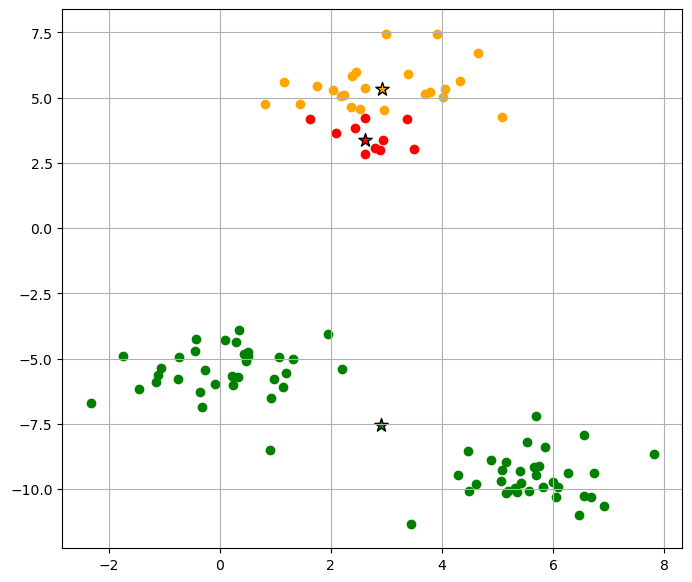

In [178]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

In [181]:
# Пересчет центроидов
new_centroids={}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

In [182]:
new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

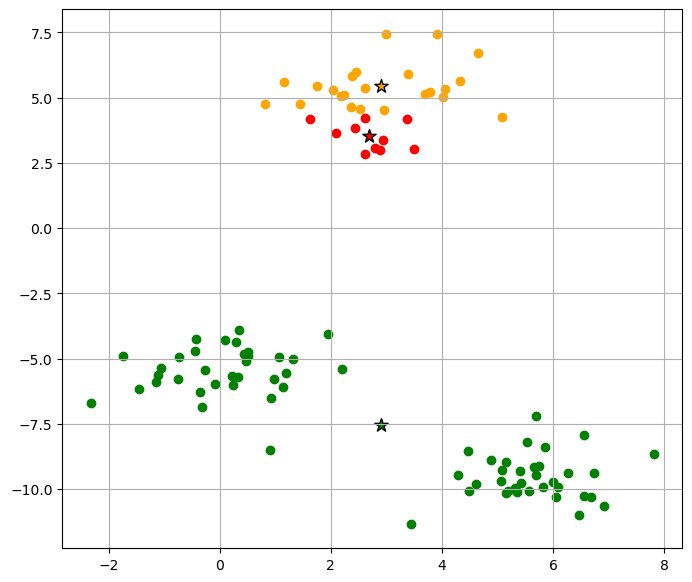

In [183]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Новые центроиды
for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], c=colors[i], marker="*", edgecolors='black', s=100)

# Функция KMeans

In [249]:
def K_Means(X, k=3, min_distance=1e-4, seed=0):
    # Инициализация центроидов
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    # Итерационный цикл
    Flag = True
    while Flag:
        clusters = {i: [] for i in range(k)}

        # Считаем расстояния
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1) # Расстояния между точкой и k центроидами
            cluster_ind = np.argmin(distances) # Индекс наименьшего расстояния (к какой цетроиде точка ближе)
            clusters[cluster_ind].append(x) # Запись точки в словарь под соответствующим кластером

        # Пересчет центроидов
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        # Критерий останова
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) <= min_distance:
                Flag = False
                
        centroids = new_centroids.copy()

    return centroids, clusters

In [253]:
centroids, clusters = K_Means(X, k, seed=1)
centroids

26 66 8
[[  5.29660654  -9.38045292]
 [  1.46485965  -0.3030066 ]
 [  6.66400306 -10.07078922]]
29 61 10
[[ 4.49298218 -8.90049529]
 [ 1.50550525  0.21865431]
 [ 6.55722276 -9.96800753]]
33 48 19
[[ 2.34915724 -7.50785928]
 [ 1.95733764  1.86223045]
 [ 6.11737555 -9.79390688]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]


array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

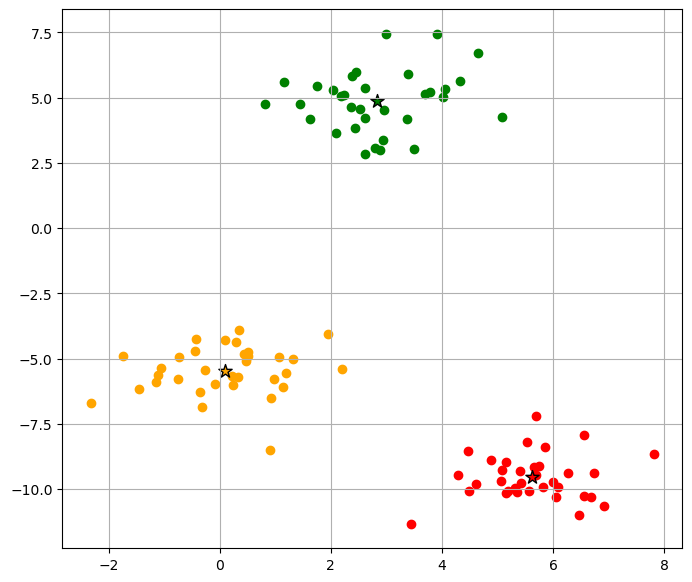

In [256]:
plt.figure(figsize=(8, 7))
plt.grid()

# Точки кластеров
for cluster in clusters:
    for x in clusters[cluster]:
        plt.scatter(x[0], x[1], c=colors[cluster])

# Центроиды
for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], c=colors[i], marker='*', s=100, edgecolors='black');

# Sklearn-Реализация

In [202]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
from sklearn.cluster import KMeans

In [204]:
model = KMeans(n_clusters=k, 
               init='k-means++', 
               max_iter=10,
               random_state=0)
model

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [205]:
model.fit(X)

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [206]:
labels = model.predict(X)

In [207]:
labels

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [226]:
model.cluster_centers_

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

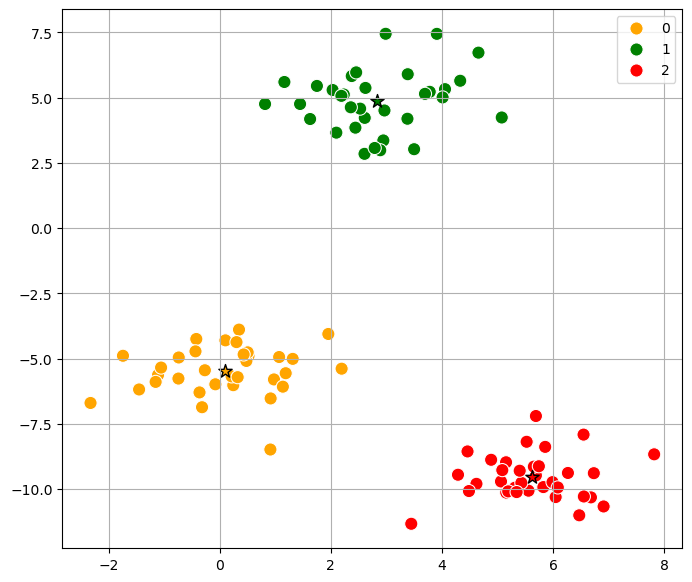

In [230]:
plt.figure(figsize=(8, 7))
plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=colors, s=90)
for i in range(len(model.cluster_centers_)):
    plt.scatter(model.cluster_centers_[i, 0], model.cluster_centers_[i, 1], marker='*', c=colors[i], s=100, edgecolors='black')


    
# for i in range(len(labels)):
#     plt.scatter(X[i, 0], X[i, 1], c=colors[labels[i]]);